# [Project name]

## Import Libraries

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## Load Data

In [142]:
holidays_events_df = pd.read_csv('./holidays_events.csv')
oil_df = pd.read_csv('./oil.csv')
stores_df = pd.read_csv('./stores.csv')
test_df = pd.read_csv('./test.csv')
train_df = pd.read_csv('./train.csv')
transactions_df = pd.read_csv('./transactions.csv')

## Data Preprossesing


### Combine Testing and Training Data For Preprocessing


In [143]:
# Adding identifier columns
train_df['data_id'] = 'df1'
test_df['data_id'] = 'df2'

# Concatenating the DataFrames
combined_df = pd.concat([train_df, test_df], ignore_index=True)

### Update Feature Data Types

In [144]:
combined_df['date'] = pd.to_datetime(combined_df['date'])

oil_df['date'] = pd.to_datetime(oil_df['date'])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

### Merge Lists

#### Merge Oil Price Data

In [145]:
combined_df = combined_df.merge(oil_df, on='date', how='left')
combined_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,data_id,dcoilwtico
2843726,2843726,2017-05-19,49,HOME APPLIANCES,1.000000,0,df1,50.32
200912,200912,2013-04-23,46,DAIRY,626.000000,0,df1,89.21
1973688,1973688,2016-01-16,37,MEATS,298.965000,1,df1,NaN
986229,986229,2014-07-09,30,MEATS,39.038002,0,df1,102.93
2503896,2503896,2016-11-09,14,LINGERIE,9.000000,0,df1,45.20
221878,221878,2013-05-05,34,LADIESWEAR,0.000000,0,df1,NaN
2467541,2467541,2016-10-19,43,SEAFOOD,1.000000,0,df1,51.59
525685,525685,2013-10-22,9,POULTRY,376.791000,0,df1,97.63
2438260,2438260,2016-10-03,22,"LIQUOR,WINE,BEER",13.000000,0,df1,48.80
820681,820681,2014-04-07,36,BOOKS,0.000000,0,df1,100.43


#### Merge Store Data

In [146]:
combined_df = combined_df.merge(stores_df, on='store_nbr', how='left')
combined_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,data_id,dcoilwtico,city,state,type,cluster
1660532,1660532,2015-07-23,50,BREAD/BAKERY,580.548,4,df1,48.11,Ambato,Tungurahua,A,14
520463,520463,2013-10-20,12,LAWN AND GARDEN,0.000,0,df1,NaN,Latacunga,Cotopaxi,C,15
1959962,1959962,2016-01-08,51,PET SUPPLIES,24.000,1,df1,33.20,Guayaquil,Guayas,A,17
939374,939374,2014-06-13,16,PREPARED FOODS,42.000,0,df1,107.49,Santo Domingo,Santo Domingo de los Tsachilas,C,3
1630621,1630621,2015-07-07,11,PERSONAL CARE,592.000,0,df1,52.33,Cayambe,Pichincha,B,6
1299746,1299746,2015-01-02,28,DAIRY,657.000,6,df1,52.72,Guayaquil,Guayas,E,10
2889883,2889883,2017-06-14,44,CLEANING,2307.000,28,df1,44.79,Quito,Pichincha,A,5
2905861,2905861,2017-06-23,42,GROCERY II,25.000,0,df1,42.86,Cuenca,Azuay,D,2
2177779,2177779,2016-05-10,14,EGGS,72.000,0,df1,44.68,Riobamba,Chimborazo,C,7
403442,403442,2013-08-15,29,HOME APPLIANCES,0.000,0,df1,107.43,Guayaquil,Guayas,E,10


#### Merge Transaction Data

In [147]:
# Merge trasaction data with data(train and test)
combined_df = combined_df.merge(transactions_df, on=['date', 'store_nbr'], how='left')
combined_df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,data_id,dcoilwtico,city,state,type,cluster,transactions
415001,415001,2013-08-21,52,PET SUPPLIES,0.0,0,df1,103.93,Manta,Manabi,A,11,NaN
1431922,1431922,2015-03-17,36,LADIESWEAR,0.0,0,df1,43.39,Libertad,Guayas,E,10,1209.0
301608,301608,2013-06-19,21,LINGERIE,0.0,0,df1,98.24,Santo Domingo,Santo Domingo de los Tsachilas,B,6,NaN
1280270,1280270,2014-12-21,31,BEAUTY,8.0,0,df1,NaN,Babahoyo,Los Rios,B,10,2032.0
589027,589027,2013-11-27,36,EGGS,25.0,0,df1,92.05,Libertad,Guayas,E,10,760.0
1547270,1547270,2015-05-21,22,SEAFOOD,0.0,0,df1,60.18,Puyo,Pastaza,C,7,NaN
1692815,1692815,2015-08-10,7,HARDWARE,0.0,0,df1,44.94,Quito,Pichincha,D,8,1327.0
2797354,2797354,2017-04-23,48,EGGS,277.0,2,df1,NaN,Quito,Pichincha,A,14,4088.0
2079429,2079429,2016-03-15,54,AUTOMOTIVE,6.0,0,df1,36.32,El Carmen,Manabi,C,3,753.0
1586144,1586144,2015-06-12,13,SEAFOOD,0.0,0,df1,59.96,Latacunga,Cotopaxi,C,15,828.0


## Feature Engineering

### Add Day, Month, and Year Data

In [148]:
# Create new columns for month, day, and year
combined_df['month'] = combined_df['date'].dt.month
combined_df['day'] = combined_df['date'].dt.day
combined_df['year'] = combined_df['date'].dt.year

# Create new columns for month, day, and year
holidays_events_df['month'] = holidays_events_df['date'].dt.month
holidays_events_df['day'] = holidays_events_df['date'].dt.day


### Remove Non-Holidays

In [149]:
# Create a list of days that are not holidays
not_holidays = ['Terremoto Manabi',
       'Terremoto Manabi+1', 
       'Terremoto Manabi+2', 'Terremoto Manabi+3',
       'Terremoto Manabi+4', 'Terremoto Manabi+5', 
       'Terremoto Manabi+6', 'Terremoto Manabi+7', 
       'Terremoto Manabi+8', 'Terremoto Manabi+9',
       'Terremoto Manabi+10', 'Terremoto Manabi+11',
       'Terremoto Manabi+12', 'Terremoto Manabi+13',
       'Terremoto Manabi+14', 'Terremoto Manabi+15',
       'Terremoto Manabi+16', 'Terremoto Manabi+17',
       'Terremoto Manabi+18', 'Terremoto Manabi+19',
       'Terremoto Manabi+20', 'Terremoto Manabi+21',
       'Terremoto Manabi+22', 'Terremoto Manabi+23',
       'Terremoto Manabi+24', 'Terremoto Manabi+25',
       'Terremoto Manabi+26', 'Terremoto Manabi+27',
       'Terremoto Manabi+28', 'Terremoto Manabi+29',
       'Terremoto Manabi+30', 'Inauguracion Mundial de futbol Brasil',
       'Mundial de futbol Brasil: Ecuador-Suiza',
       'Mundial de futbol Brasil: Ecuador-Honduras',
       'Mundial de futbol Brasil: Ecuador-Francia',
       'Mundial de futbol Brasil: Octavos de Final',
       'Mundial de futbol Brasil: Cuartos de Final',
       'Mundial de futbol Brasil: Semifinales',
       'Mundial de futbol Brasil: Tercer y cuarto lugar',
       'Mundial de futbol Brasil: Final']

holidays_events_df = holidays_events_df[~holidays_events_df['description'].isin(not_holidays)]

### Add Holiday Information

In [150]:
# Filter out transferred holidays (where transferred is True)
holidays_events_df = holidays_events_df[(holidays_events_df['transferred'].isna()) | (holidays_events_df['transferred'] == False)]

# Separate DataFrame for national holidays
national_holidays = holidays_events_df[holidays_events_df['type'] == 'National']

# DataFrame for local holidays
local_holidays = holidays_events_df[holidays_events_df['type'] != 'National']

# Aggregating national_holidays
national_holidays = national_holidays.groupby(['day', 'month']).agg('first').reset_index()

# Aggregating local_holidays
local_holidays = local_holidays.groupby(['day', 'month', 'locale_name']).agg('first').reset_index()

# Merge for national holidays
combined_df = combined_df.merge(national_holidays[['day', 'month']], on=['day', 'month'], how='left', indicator=True)
combined_df['was_holiday'] = combined_df['_merge'] == 'both'
combined_df.drop('_merge', axis=1, inplace=True)

### Add Categories For Product Families

In [151]:
# Categories
category_mapping = {
    "food_bev": ['BEVERAGES', 'BREAD/BAKERY', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'MEATS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SEAFOOD'],
    "personal_home": ['BABY CARE', 'BEAUTY', 'CLEANING', 'HOME CARE', 'PERSONAL CARE'],
    "apparel": ['LADIESWEAR', 'LINGERIE'],
    "leisure": ['BOOKS', 'CELEBRATION', 'MAGAZINES', 'PLAYERS AND ELECTRONICS'],
    "household": ['HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES'],
    "specialty": ['AUTOMOTIVE', 'LAWN AND GARDEN', 'PET SUPPLIES', 'SCHOOL AND OFFICE SUPPLIES'],
    "alcohol": ['LIQUOR,WINE,BEER']
}

# Define a function to map each item to its category
def map_category(item):
    for category, items in category_mapping.items():
        if item in items:
            return category
    return 'other'

combined_df['sale_cat'] = combined_df['family'].apply(map_category)

## Visualizations

### [Add Heading Here]

/var/folders/2t/ywk_mcj957z288vdj9l0q89c0000gn/T/ipykernel_9466/3199078449.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=combined_df, x='date', y='sales', palette=palette)


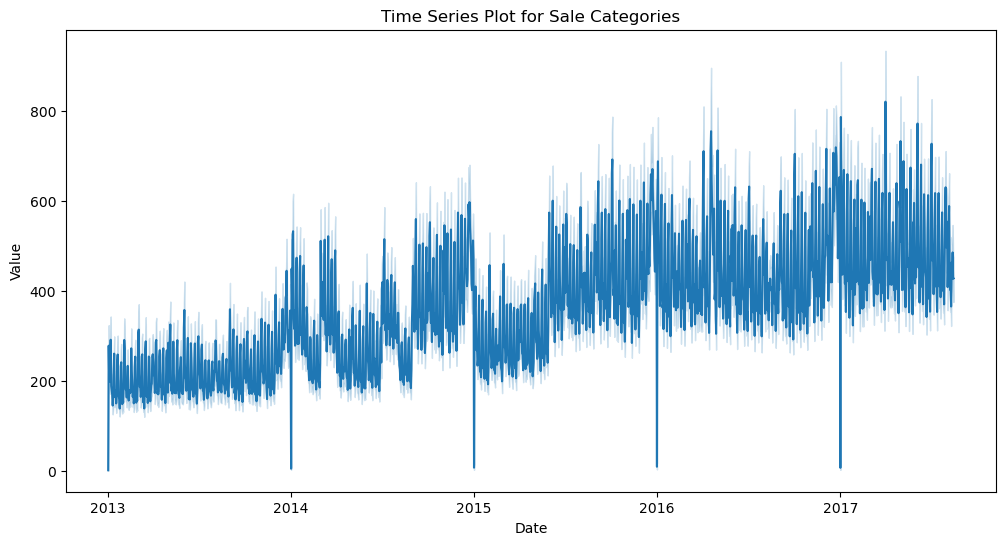

In [152]:
# List of categories
categories = ['food_bev', 'personal_home', 'apparel', 'leisure', 'household', 'specialty', 'alcohol']

# Define a color palette
palette = sns.color_palette("hsv", len(categories))

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the time series plot
sns.lineplot(data=combined_df, x='date', y='sales', palette=palette)

# Add title and labels
plt.title('Time Series Plot for Sale Categories')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

### [Add Heading Here]

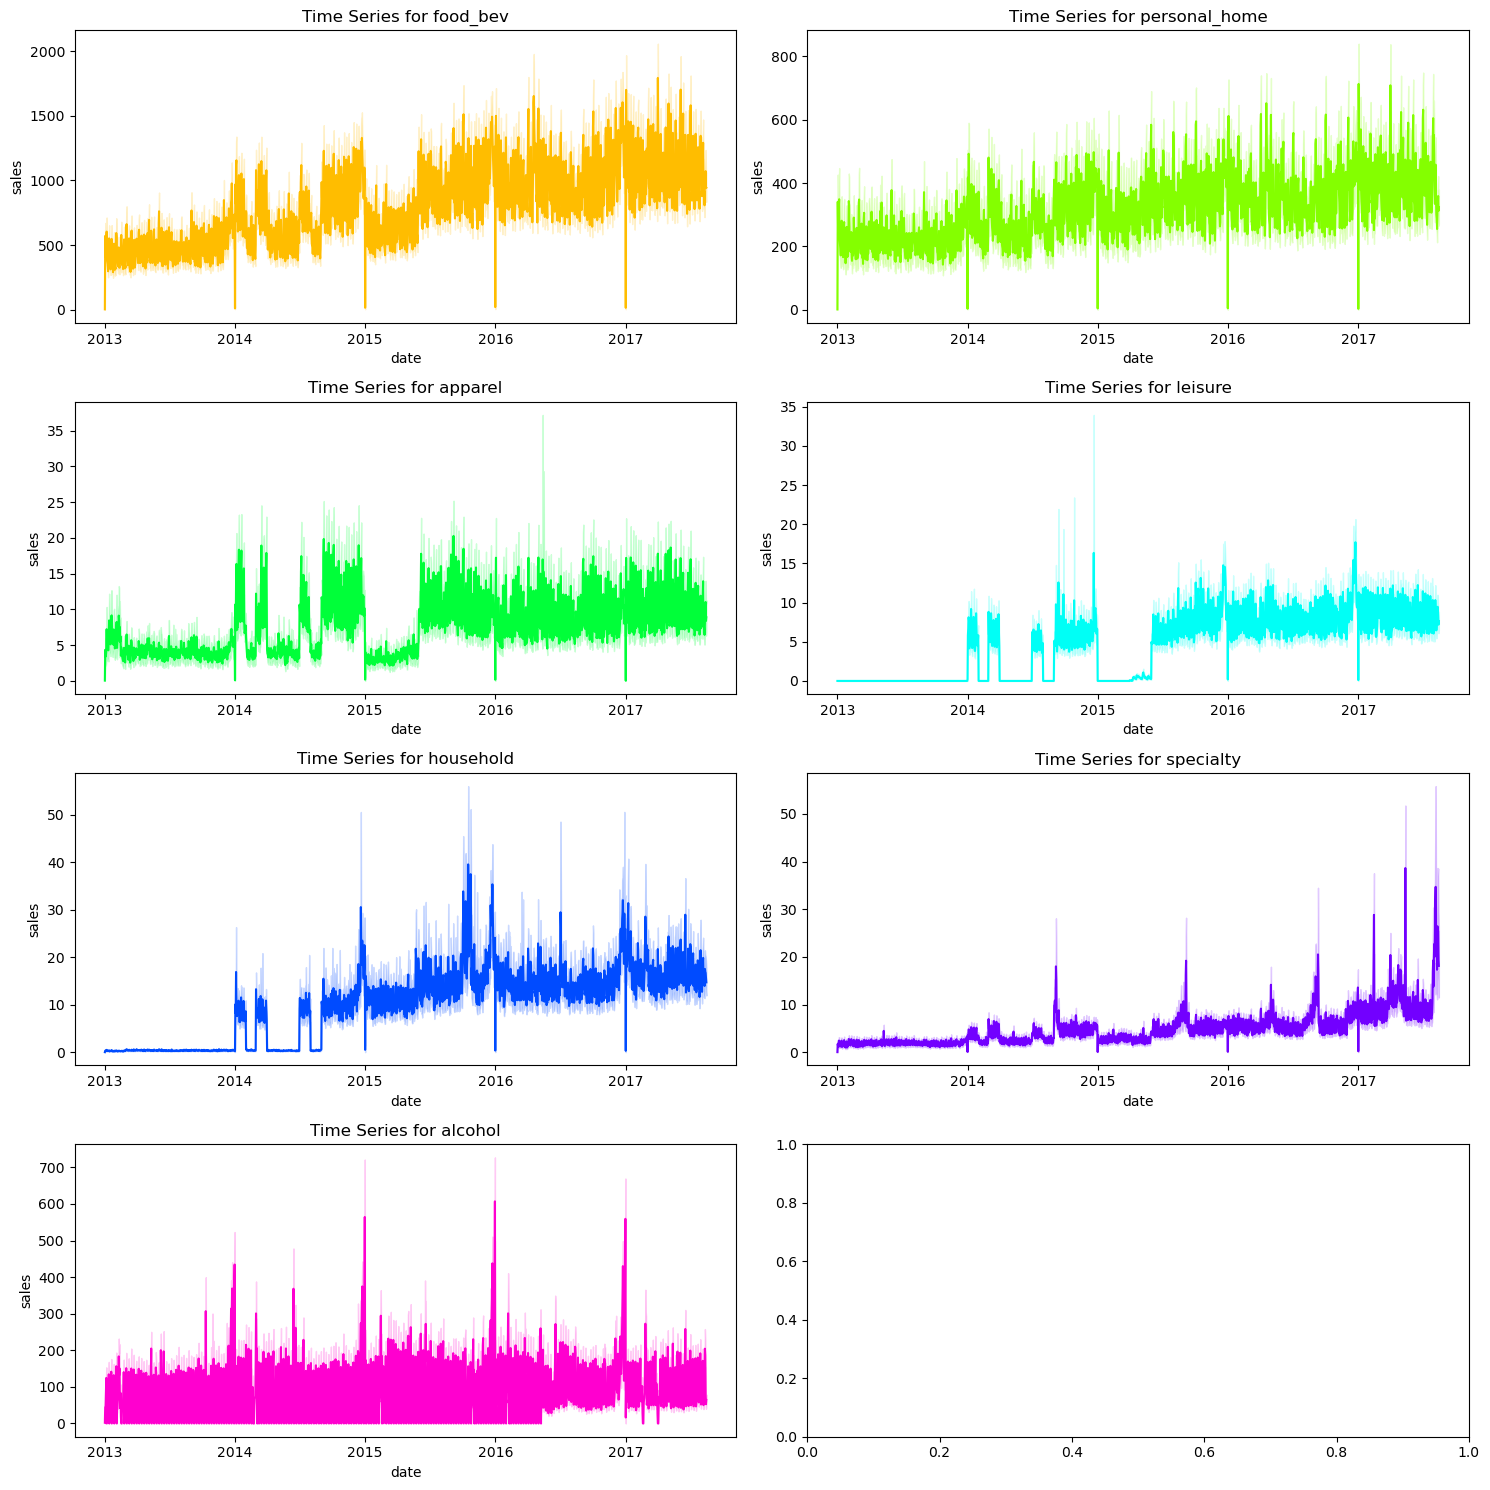

In [153]:
# Create a figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 15)) 
axs = axs.flatten()  # Flatten the array for easy indexing

# Loop through categories and create a subplot for each
for i, cat in enumerate(categories):
    sns.lineplot(
        data=combined_df[combined_df['sale_cat'] == cat], 
        x='date', 
        y='sales', 
        color=palette[i], 
        ax=axs[i]
    )
    axs[i].set_title(f'Time Series for {cat}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Store Cluster Vs. Type

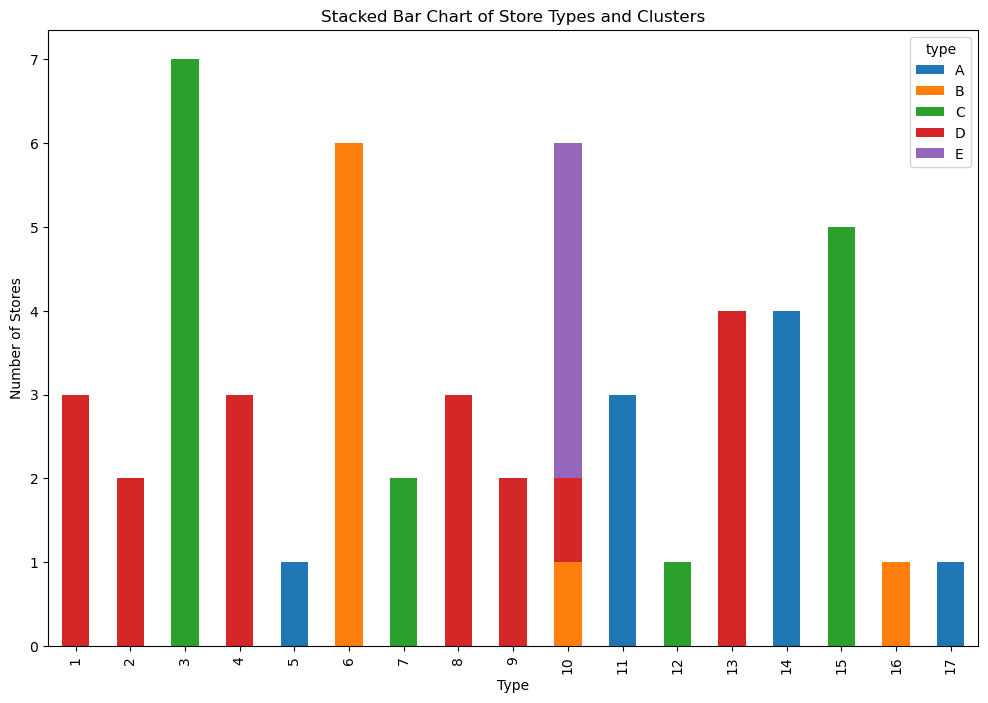

In [154]:
# Stacked bar chart
stacked_data = stores_df.groupby(['cluster', 'type']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Store Types and Clusters')
plt.xlabel('Type')
plt.ylabel('Number of Stores')
plt.show()

## Notebook Clean Up

In [155]:
del oil_df
del stores_df
del transactions_df
del holidays_events_df
del train_df
del test_df

impute_df = combined_df.copy()

del combined_df

## Data Preparation For Modeling

### Data Imputation

#### Impute Oil Prices

In [156]:
# seperate target features from df to impute oil price

test = impute_df[impute_df['dcoilwtico'].isna()]
feature_cols = ['id','city', 'state','dcoilwtico', 'type','store_nbr', 'family',
                 'cluster','month', 'day', 'year']
train = impute_df[~impute_df['dcoilwtico'].isna()]
train = train[feature_cols]
test = test[feature_cols]

In [157]:
# seperate targets and features to impute oil price

X_train = train.drop(['id','dcoilwtico'], axis = 1)
y_train = train['dcoilwtico']

X_test = test.drop(['id','dcoilwtico'], axis = 1)
X_test

,city,state,type,store_nbr,family,cluster,month,day,year
0,Quito,Pichincha,D,1,AUTOMOTIVE,13,1,1,2013
1,Quito,Pichincha,D,1,BABY CARE,13,1,1,2013
2,Quito,Pichincha,D,1,BEAUTY,13,1,1,2013
3,Quito,Pichincha,D,1,BEVERAGES,13,1,1,2013
4,Quito,Pichincha,D,1,BOOKS,13,1,1,2013
...,...,...,...,...,...,...,...,...,...
3022267,Quito,Pichincha,B,9,POULTRY,6,8,27,2017
3022268,Quito,Pichincha,B,9,PREPARED FOODS,6,8,27,2017
3022269,Quito,Pichincha,B,9,PRODUCE,6,8,27,2017
3022270,Quito,Pichincha,B,9,SCHOOL AND OFFICE SUPPLIES,6,8,27,2017


In [158]:
categorical_columns = ['city','state','type','family']

for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    
for col in categorical_columns:
    X_test[col] = X_test[col].astype('category')

In [159]:
# use lightlgbm to predict oil prices for missing values
cat_features = ['city','state','type','family']

model_data = lgb.Dataset(X_train, label=y_train, categorical_feature = cat_features)


# Set hyperparameters for the model
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100
lgb_model = lgb.train(params, model_data, num_round)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 2093850, number of used features: 9
[LightGBM] [Info] Start training from score 67.714366


In [160]:
# make preds with lgb
oil_values = lgb_model.predict(X_test)

In [161]:
oil_vals_ser = pd.Series(oil_values)
test['dcoilwtico'] = oil_vals_ser.values
impute_df.update(test)

In [162]:
impute_df.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales            28512
onpromotion          0
data_id              0
dcoilwtico           0
city                 0
state                0
type                 0
cluster              0
transactions    274296
month                0
day                  0
year                 0
was_holiday          0
sale_cat             0
dtype: int64

#### Impute Transactions

In [163]:
# seperate target features from df to impute oil price

test = impute_df[impute_df['transactions'].isna()]
feature_cols = ['id','city', 'state','dcoilwtico', 'type','store_nbr', 'family',
                 'cluster','month', 'day', 'year', 'transactions']
train = impute_df[~impute_df['transactions'].isna()]
train = train[feature_cols]
test = test[feature_cols]

In [164]:
# seperate targets and features to impute oil price

X_train = train.drop(['id','transactions'], axis = 1)
y_train = train['transactions']

X_test = test.drop(['id','transactions'], axis = 1)

In [165]:
# convert strings to catagorical type

categorical_columns = ['city','state','type','family']

for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    
for col in categorical_columns:
    X_test[col] = X_test[col].astype('category')

In [166]:
# create model to predict missing transaction values

cat_features = ['city','state','type','family']

model_data = lgb.Dataset(X_train, label=y_train, categorical_feature = cat_features)


# Set hyperparameters for the model
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100
lgb_model2 = lgb.train(params, model_data, num_round)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 2755104, number of used features: 10
[LightGBM] [Info] Start training from score 1694.602158


In [167]:
trans_preds = lgb_model2.predict(X_test)

In [168]:
trans_pred_ser = pd.Series(trans_preds)
test['transactions'] = trans_pred_ser.values
impute_df.update(test)

In [169]:
impute_df.isna().sum()

id                  0
date                0
store_nbr           0
family              0
sales           28512
onpromotion         0
data_id             0
dcoilwtico          0
city                0
state               0
type                0
cluster             0
transactions        0
month               0
day                 0
year                0
was_holiday         0
sale_cat            0
dtype: int64

In [170]:
complete_df = impute_df.copy()
del impute_df

### Encoding and Scaling

In [171]:
complete_df.columns


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'data_id',
       'dcoilwtico', 'city', 'state', 'type', 'cluster', 'transactions',
       'month', 'day', 'year', 'was_holiday', 'sale_cat'],
      dtype='object')

In [172]:
columns = [ 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type', 'cluster', 'transactions',
       'month', 'day', 'year', 'was_holiday', 'sale_cat']
pre_model_df = complete_df[columns]

In [173]:
target = pre_model_df['sales']
features = pre_model_df.drop('sales', axis = 1)

In [174]:
# one hot encode and scale data

# select columns to encode or scale
cat_columns = features.select_dtypes(include = ['object'])
num_columns = features.select_dtypes(include = ['float64','int64'])

# instanciate transformers
ohe_transformer = OneHotEncoder(drop = 'first')
num_transformer = StandardScaler()

# combine transformers
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', ohe_transformer, cat_columns),
        ('num', num_transformer, num_columns)
    ])

# create pipeline
pipe = Pipeline(steps = [('preprocessor', preprocessor)])

features_processed = pipe.fit_transform(features)

# convert back to df
column_names = (
    categorical_transformer.get_feature_names_out(cat_columns) + num_columns
    passthrough_cols
)

features_processed_df = pd.DataFrame(features_processed, columns = columns_names)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3706378364.py, line 25)